In [109]:
import os
import pickle
import numpy as np
import seaborn as sns
import scipy
root_path = '/Users/jiahang/Documents/dagma/src/dagma/'

with open(os.path.join(root_path, 'simulated_data/v11/v40/W/W_2_0.pkl'), 'rb') as f:
    W = pickle.load(f)
with open(os.path.join(root_path, 'simulated_data/v11/v40/X/X_1.pkl'), 'rb') as f:
    X = pickle.load(f)
n_nodes = 40
W_true = X['W_true']
B_true = (W_true != 0)
W_est = W['W_est']

W_ori_est, W_kno_est = W_est[:n_nodes, :n_nodes], W_est[n_nodes:, :n_nodes]
Z = np.abs(W_ori_est) - np.abs(W_kno_est)

eps = 1e-1
Z0 = (np.abs(W_est[:n_nodes, :n_nodes][~B_true]) - np.abs(W_est[n_nodes:, :n_nodes][~B_true]))
eps_mask = (Z0 < 0. + eps) & (Z0 > 0.)
n_eps_mask = (Z0 > 0. + eps)

In [112]:
def sigmoid(alpha, x):
    x = x - x.mean()
    return scipy.special.expit(alpha * x)

In [110]:
(np.abs(W_est @ W_est) / (np.abs(W_est) + 1e-8))[:n_nodes, :n_nodes][~B_true][eps_mask].mean()

13193.424959749811

In [111]:
(np.abs(W_est @ W_est) / (np.abs(W_est) + 1e-8))[:n_nodes, :n_nodes][~B_true][n_eps_mask].mean()

12.472773898717172

<Axes: >

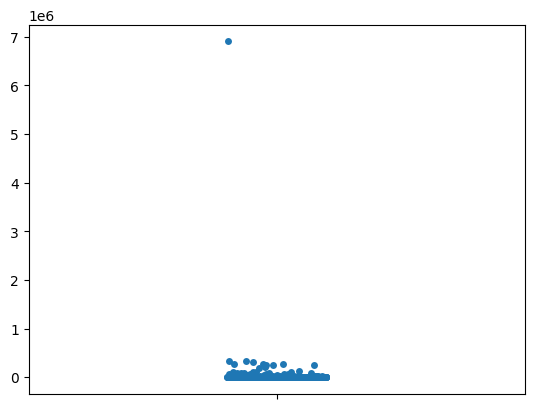

In [119]:
sns.stripplot((np.abs(W_est @ W_est) / (np.abs(W_est) + 1e-8))[:n_nodes, :n_nodes][~B_true][eps_mask].flatten())

In [114]:
(np.abs(W_est @ W_est) / (np.abs(W_est) + 1e-8))[:n_nodes, :n_nodes][~B_true][eps_mask]

(975,)

In [163]:
a = (np.abs(W_est @ W_est) / (np.abs(W_est) + 1e-8))[:n_nodes, :n_nodes]
a[a > 1e2] = 0.
res = sigmoid(10, a)

In [164]:
res[B_true]

array([8.22663399e-18, 6.28487115e-18, 1.04143362e-17, 1.09066264e-09,
       6.69160912e-16, 9.76517782e-18, 7.10345981e-18, 6.57986414e-18,
       6.64637878e-18, 7.89263143e-18, 5.21091424e-16, 9.92547148e-10,
       2.96298414e-17, 3.88601851e-12, 8.18022966e-09, 6.57244699e-18,
       8.85644606e-18, 6.55149564e-18, 8.17768276e-18, 2.05913672e-17,
       1.66852468e-17, 3.25681608e-12, 6.07347741e-18, 6.93699966e-18,
       2.22996457e-12, 2.81620432e-10, 6.57352601e-18, 6.72809343e-18,
       1.67389589e-14, 6.71735983e-18, 6.87933623e-17, 6.66005732e-18,
       6.08396479e-18, 1.00000000e+00, 1.22417335e-16, 1.73977652e-17,
       1.20093911e-12, 6.59235429e-18, 8.17112669e-18, 9.57246530e-18,
       2.71897939e-10, 6.98958592e-18, 6.37809066e-18, 6.14179668e-18,
       1.42965208e-17, 6.34274075e-18, 7.94570148e-12, 1.03485461e-12,
       1.48667070e-07, 1.04909394e-14, 7.34983164e-16, 6.68679910e-18,
       9.99999993e-01, 1.00000000e+00, 6.76013059e-18, 6.25298000e-18,
      

In [170]:
(res[~B_true] > 1e-6).sum() / res[~B_true].size

0.23472222222222222

In [169]:
(res[B_true] > 1e-6).sum() / res[B_true].size

0.05625

In [171]:
a = (np.abs(W_est) / (np.abs(W_est @ W_est) + 1e-8))[:n_nodes, :n_nodes]
a[a > 1e2] = 0.
res = sigmoid(10, a)

In [172]:
(res[~B_true] > 1e-6).sum() / res[~B_true].size

0.16666666666666666

In [173]:
(res[B_true] > 1e-6).sum() / res[B_true].size

0.4

# MIsc

In [45]:
(np.abs(W_est) / np.abs(np.linalg.matrix_power(W_est, 2)))[:n_nodes, :n_nodes][~B_true][eps_mask].mean()

2.4766188595882683

In [46]:
(np.abs(W_est) / np.abs(np.linalg.matrix_power(W_est, 2)))[:n_nodes, :n_nodes][~B_true][eps_mask].std()

14.001971405405875

In [47]:
(np.abs(W_est) / np.abs(np.linalg.matrix_power(W_est, 2)))[:n_nodes, :n_nodes][~B_true][~eps_mask].mean()

15.37745616839613

In [48]:
(np.abs(W_est) / np.abs(np.linalg.matrix_power(W_est, 2)))[:n_nodes, :n_nodes][~B_true][~eps_mask].std()

182.447570303187

In [54]:
(np.abs(W_est) / np.abs(np.linalg.matrix_power(W_est, 2)))[:n_nodes, :n_nodes][~B_true][n_eps_mask].mean()

18.603409782654595

In [55]:
(np.abs(W_est) / np.abs(np.linalg.matrix_power(W_est, 2)))[:n_nodes, :n_nodes][~B_true][n_eps_mask].std()

107.90004319562023

In [63]:
(np.abs(W_est) / np.abs(np.linalg.matrix_power(W_est, 2)))[:n_nodes, :n_nodes][B_true].mean()

226.17865538155257

In [65]:
(np.abs(np.linalg.matrix_power(W_est, 2)) / (np.abs(W_est) + 1e-8))[:n_nodes, :n_nodes][B_true].mean()

0.6533408937531717

In [66]:
(np.abs(np.linalg.matrix_power(W_est, 2)) / (np.abs(W_est) + 1e-8))[:n_nodes, :n_nodes][~B_true].mean()

53867.357910511935